# Desafío LATAM Airlines para Ingenieros de Datos

## Instrucctiones

1. Seguir las instrucciones en el [README.md](./README.md) (ver en preview) para la creación del proyecto y cuenta de servicio.
2. Ejecutar las celdas del notebook.

In [1]:
import os
import random
from pathlib import Path
from datetime import datetime

from gcp_create_bucket import create_bucket
from gcp_upload_to_bucket import upload_to_bucket

In [2]:
suffix =    "".join(str(random.randint(0, 9)) for _ in range(12))
bucket_name = f"de-challenge-juan-villanueva-{suffix}"

credentials_path = "/Users/jvillanu/latam-airlines/de-tweets-challenge/gcp_cloud/credentials/de-tweets-challenge-2c7629607188.json" # Actualizar con el path de las credenciales
source_file = "/Users/jvillanu/latam-airlines/de-tweets-challenge/data/farmers-protest-tweets-2021-2-4-2.json" # Actualizar con el path de los datos
target_file_name = f"raw/tweets_data_{datetime.now().strftime("%Y%m%d_%H%M%S")}"

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = str(credentials_path)

In [ ]:
bucket = create_bucket(bucket_name)
bucket_name = bucket.name

Bucket de-challenge-juan-villanueva-046652057440 creado exitosamente.


'Archivo raw/tweets_data_20260119_042006 subido a de-challenge-juan-villanueva-046652057440 satisfactoriamente'

### Desplegar en Cloud Run Function

Copiar y pegar el siguiente comando en la terminal desde el directorio **cloud-run-function**. En mi caso, el comando es el siguiente (```--trigger-resource``` y ```--service-account``` deben reemplazarse):

```bash
gcloud functions deploy process_tweets_data \
  --runtime python311 \
  --gen2 \
  --region us-central1 \
  --trigger-event google.storage.object.finalize \
  --trigger-resource de-challenge-juan-villanueva-046652057440 \
  --entry-point process_tweets_data \
  --service-account latam-account@de-tweets-challenge.iam.gserviceaccount.com \
  --memory 1Gi
```

- ```--trigger-resource``` es el nombre de tu bucket
- ```--service-account``` es tu cuenta de servicio

In [ ]:
# DESPUÉS DE RECIBIR LA CONFIRMACIÓN DEL DESPLIEGUE DEL CÓDIGO EN CLOUD RUN FUNCTIONS, cargar un archivo.

upload_to_bucket(bucket_name, source_file, target_file_name)

'Archivo raw/tweets_data_20260119_042006 subido a de-challenge-juan-villanueva-046652057440 satisfactoriamente'

En la terminal, correr:

```bash
gcloud projects add-iam-policy-binding de-tweets-challenge \
  --member="user:<YOUR_EMAIL>" \
  --role="roles/storage.objectViewer"
```

Reemplazando ```<YOUR_EMAIL>``` por tu correo para poder ver el output en el bucket.

## Finalmente, en el bucket se puede ver el output:

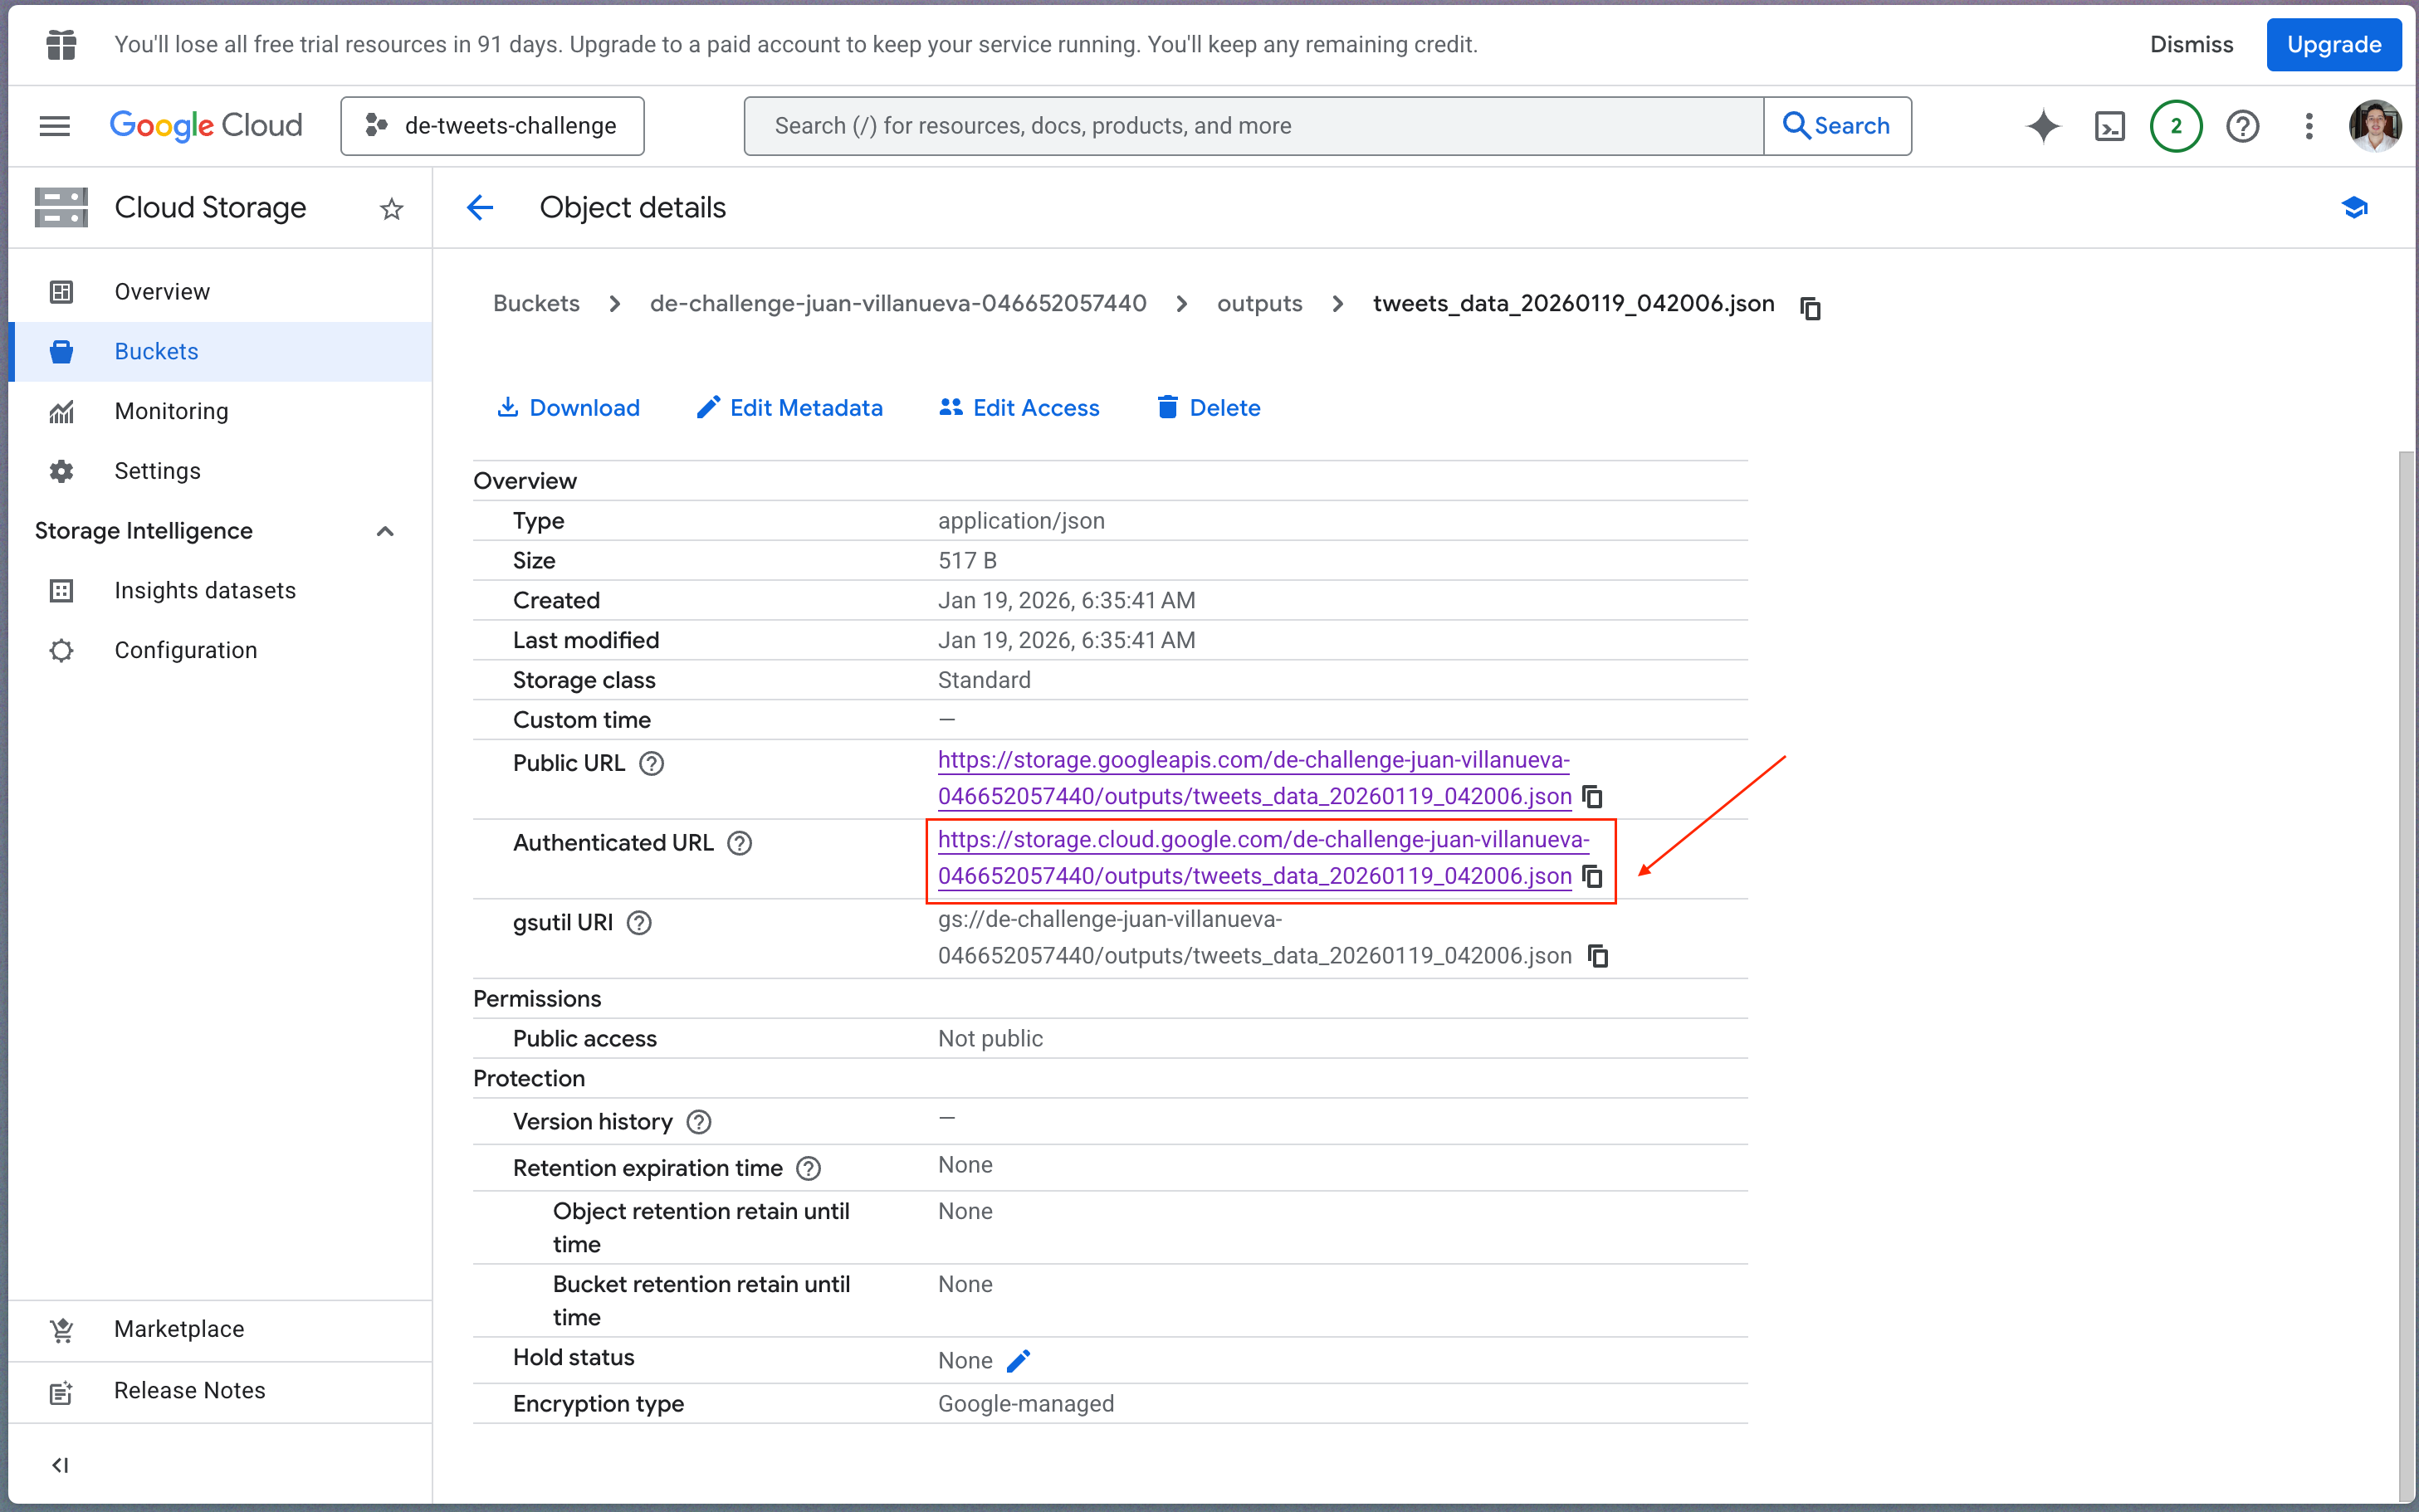

## Este es el resultado de la función q1.py

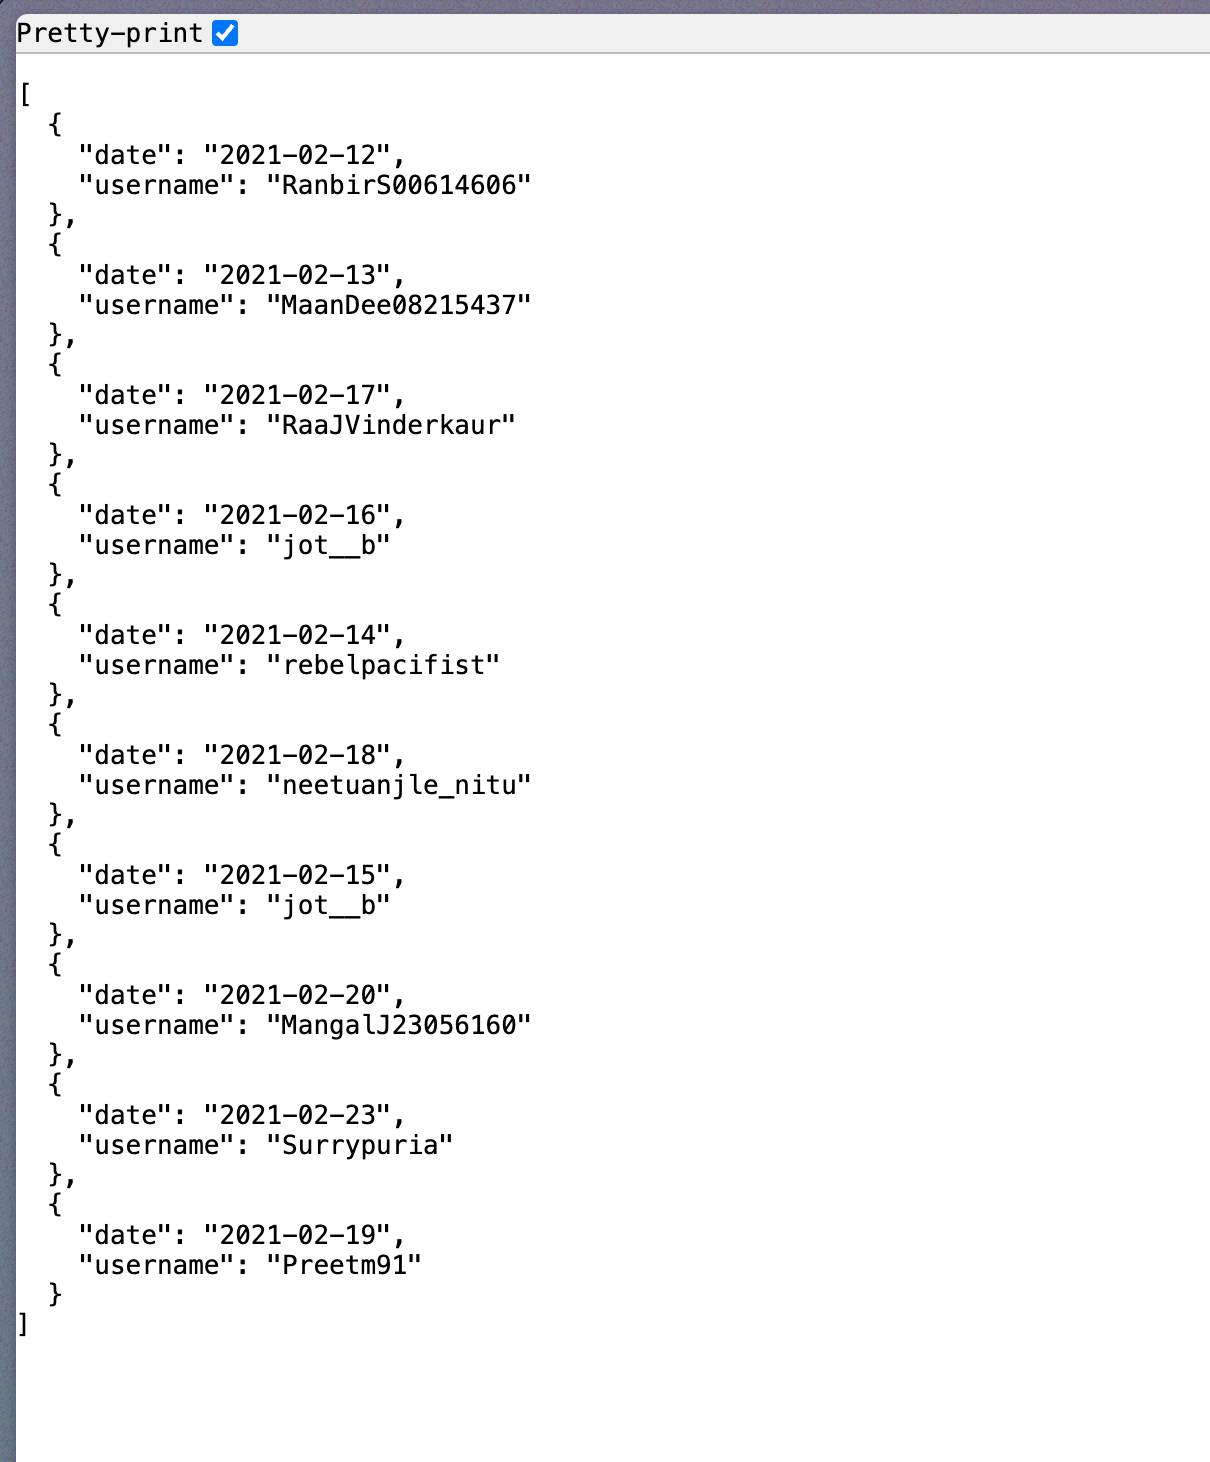